# Data Wrangling datos linio Colombia de la seccion de computación 

In [190]:
import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import nltk
from nltk import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import Counter
from wordcloud import WordCloud


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

from pylab import rcParams
import warnings

#Base de datos
#pip install pymysql
import pymysql
#pip install sqlalchemy
from sqlalchemy import create_engine

print("Librerias instaladas")



Librerias instaladas


**Conexion con la Base de datos**

Relizamos y verificamos la conexion de la base de datos, en donde ya esta previamente creada con nombre "liniodb", de manera local, y verificamos que la conexion este establecida, para más adelante poder manejarlas y utilizar la informacion directamente con la BD.


In [191]:
#Conexion Base de datos
cadena_conexion='mysql+pymysql://root@127.0.0.1:3306/liniodb'
conexion=create_engine(cadena_conexion)
print("Conexion establecida")

Conexion establecida


In [193]:
df

,IdProducto,Titulo,Precio
0,1,HP 245 G7 AMD E2 9000E 4GB DDR4 1 TERA PANTALL...,$1.099.000
1,2,"Monitor Led Samsung 22"" S22F350FHL Negro",$375.000
2,3,Monitor Samsung 24” LED LS24F350FHLXZL Negro,$464.900
3,4,Nueva Impresora Multifuncional Hp 315 Sistema ...,$509.800
4,5,EPSON WF3720 SUPERIOR A LA L5190 + SISTEMA ECO...,$1.099.900
...,...,...,...
210,406,"Monitor Samsung Curvo 24"" LC24F390FHLXZL Negro",$599.900
211,407,Monitor Samsung 24” LED LS24F350FHLXZL Negro,$509.900
212,409,Monitor Samsung Uhd 28 Led 4k,$1.397.000
213,410,"Monitor Samsung Curvo 23,5"" 1920 X 1080 - LC24...",$599.799


Tenemos un archivo .csv que contiene información sobre los comentarios de los producto de la pagina Linio colombia especificamente de la seccion de Computación, asociando algunos valores basicos del producto, con las respectivas reseñas que dejan los usuarios, de esta forma, se tienen los siguientes atributos en los datos:

1. **Nombre o Titulo del producto :** cadena de caracteres que describen el nombre del producto
3. **Precio:** cadena de caracteres que describen el valor comercial del producto 
4. **Reseñas** comentario escrito en texto plano que describen la opinion del usuario sobre el producto 
5. **Estrellas:** Cantidad de estrellas que recibe el producto 
6. **Autor:** cadena de caracteres que describen el nombre del ususario que realizo la reseña


In [268]:
# Cargando el dataset de web scraping
data = pd.read_csv('Data/linio.csv')
data.index.names = ['IdReseña']

In [269]:
# Primeras 10 filas del Dataframe
data.head(10)

,IdProducto,Titulo,Precio,Reseñas,Estrellas,Autor
IdReseña,,,,,,
0,1,HP 245 G7 AMD E2 9000E 4GB DDR4 1 TERA PANTALL...,$1.099.000,NaN,5,Por Deivid Rosero el 23/09/20
1,1,HP 245 G7 AMD E2 9000E 4GB DDR4 1 TERA PANTALL...,$1.099.000,Buen equipo y entrega a tiempo.,5,Por Deivid Rosero el 23/09/20
2,1,HP 245 G7 AMD E2 9000E 4GB DDR4 1 TERA PANTALL...,$1.099.000,No me gusto el audio. No se oye bien.,1,Por Maria Fernanda Pineda Arias el 23/09/20
3,1,HP 245 G7 AMD E2 9000E 4GB DDR4 1 TERA PANTALL...,$1.099.000,NaN,5,Por marisol valencia diaz el 21/09/20
4,1,HP 245 G7 AMD E2 9000E 4GB DDR4 1 TERA PANTALL...,$1.099.000,NaN,5,Por Yei Alvarez Arango el 21/09/20
5,1,HP 245 G7 AMD E2 9000E 4GB DDR4 1 TERA PANTALL...,$1.099.000,Funciona Bien,5,Por Luis Alfonso Moreno Luna el 21/09/20
6,1,HP 245 G7 AMD E2 9000E 4GB DDR4 1 TERA PANTALL...,$1.099.000,NaN,5,Por Manuel Olimpo Quiñones Meza el 21/09/20
7,1,HP 245 G7 AMD E2 9000E 4GB DDR4 1 TERA PANTALL...,$1.099.000,NaN,5,Por jhony alexander araujo delgado jhony alexa...
8,1,HP 245 G7 AMD E2 9000E 4GB DDR4 1 TERA PANTALL...,$1.099.000,No inicia el pc,1,Por JUAN DAVID URREA ZULUAGA el 21/09/20


In [270]:
data.shape

(3307, 6)

**1. Dataset Structuring**
Tomando como referencia las columnas presentes en el dataset que hemos importando, donde se puede notar que existe una columna de nombre ```Autor``` que tiene datos como el nombre de la persona que realizo el comentario y la decha en la que este fue realizado, ambos datos separados por la siguiente expresion ``` el ```.



In [271]:
data[['Autor','Fecha']] = data['Autor'].str.split(' el ',expand=True)
data.head()

,IdProducto,Titulo,Precio,Reseñas,Estrellas,Autor,Fecha
IdReseña,,,,,,,
0,1,HP 245 G7 AMD E2 9000E 4GB DDR4 1 TERA PANTALL...,$1.099.000,NaN,5,Por Deivid Rosero,23/09/20
1,1,HP 245 G7 AMD E2 9000E 4GB DDR4 1 TERA PANTALL...,$1.099.000,Buen equipo y entrega a tiempo.,5,Por Deivid Rosero,23/09/20
2,1,HP 245 G7 AMD E2 9000E 4GB DDR4 1 TERA PANTALL...,$1.099.000,No me gusto el audio. No se oye bien.,1,Por Maria Fernanda Pineda Arias,23/09/20
3,1,HP 245 G7 AMD E2 9000E 4GB DDR4 1 TERA PANTALL...,$1.099.000,NaN,5,Por marisol valencia diaz,21/09/20
4,1,HP 245 G7 AMD E2 9000E 4GB DDR4 1 TERA PANTALL...,$1.099.000,NaN,5,Por Yei Alvarez Arango,21/09/20


Como podemos notar existen las columnas necesarias para llevar a cabo nuestro estudio, por lo cual no es necesario eliminar algunas columna

**2. Dataset Cleaning**
Como se puede observar tenemos algunos campos nulos, por lo que se exploran los valores nulos para realizarles el tratamiento, donde se limpian los datos para un análisis de alta calidad.

Primero vamos a listar cuántos datos nulos o inexistentes existen en el conjunto de datos.

In [272]:
data.isnull().sum()


IdProducto       0
Titulo           0
Precio           0
Reseñas       2050
Estrellas        0
Autor            0
Fecha            0
dtype: int64

Podemos ver que hay una columnas dentro de nuestro conjunto de datos que presenta datos nulos o inexistentes son: la columna de ```Reseñas``` y la columna de```Estrellas```.

Primero se lleva a cabo el proceso de filtrar, el cual permite visaulizar los datos nulos en un nuevo DataFrame con solo estas filas: 

In [273]:
data[pd.isnull(data).any(axis=1)]

,IdProducto,Titulo,Precio,Reseñas,Estrellas,Autor,Fecha
IdReseña,,,,,,,
0,1,HP 245 G7 AMD E2 9000E 4GB DDR4 1 TERA PANTALL...,$1.099.000,NaN,5,Por Deivid Rosero,23/09/20
3,1,HP 245 G7 AMD E2 9000E 4GB DDR4 1 TERA PANTALL...,$1.099.000,NaN,5,Por marisol valencia diaz,21/09/20
4,1,HP 245 G7 AMD E2 9000E 4GB DDR4 1 TERA PANTALL...,$1.099.000,NaN,5,Por Yei Alvarez Arango,21/09/20
6,1,HP 245 G7 AMD E2 9000E 4GB DDR4 1 TERA PANTALL...,$1.099.000,NaN,5,Por Manuel Olimpo Quiñones Meza,21/09/20
7,1,HP 245 G7 AMD E2 9000E 4GB DDR4 1 TERA PANTALL...,$1.099.000,NaN,5,Por jhony alexander araujo delgado jhony alexa...,21/09/20
...,...,...,...,...,...,...,...
3301,415,"Monitor Samsung 28"" Gamer LU28E590DS/ZL UHD 4K",$1.199.000,NaN,5,Reseñado,11/08/20
3302,417,Diadema Gamer Razer Meka Overwatch,$424.000,NaN,5,Por Gabriel Cuero Gabriel Cuero,11/09/20
3303,419,"Webcam con micrófono, 1080P HD Streaming USB PC",$149.900,NaN,5,Por mayulei rangel garay,05/08/20


En este caso, a la columna ```Reseñas``` le daremos el *Tratamiento de Eliminacion*, pues haremos un análisis del texto de los comentarios y al no tener esta variable de vital importancia en las observaciones, no son de nuestro interés, lo mismo ocurre columna ```Estrellas```. Esto lo haremos usando el método ```.notna()``` sobre la serie de interés:

In [274]:
data = data[data['Reseñas'].notna()]
data = data[data['Estrellas'].notna()]
data


,IdProducto,Titulo,Precio,Reseñas,Estrellas,Autor,Fecha
IdReseña,,,,,,,
1,1,HP 245 G7 AMD E2 9000E 4GB DDR4 1 TERA PANTALL...,$1.099.000,Buen equipo y entrega a tiempo.,5,Por Deivid Rosero,23/09/20
2,1,HP 245 G7 AMD E2 9000E 4GB DDR4 1 TERA PANTALL...,$1.099.000,No me gusto el audio. No se oye bien.,1,Por Maria Fernanda Pineda Arias,23/09/20
5,1,HP 245 G7 AMD E2 9000E 4GB DDR4 1 TERA PANTALL...,$1.099.000,Funciona Bien,5,Por Luis Alfonso Moreno Luna,21/09/20
8,1,HP 245 G7 AMD E2 9000E 4GB DDR4 1 TERA PANTALL...,$1.099.000,No inicia el pc,1,Por JUAN DAVID URREA ZULUAGA,21/09/20
10,1,HP 245 G7 AMD E2 9000E 4GB DDR4 1 TERA PANTALL...,$1.099.000,Recomendado ciento por ciento,5,Por JOSE IGNACIO MORENO ALVAREZ,20/09/20
...,...,...,...,...,...,...,...
3289,406,"Monitor Samsung Curvo 24"" LC24F390FHLXZL Negro",$599.900,Buen producto.,5,Por Douglas Eduardo Molina Orjuela Douglas Edu...,26/04/20
3292,407,Monitor Samsung 24” LED LS24F350FHLXZL Negro,$509.900,Muchas gracias llegó rápido muy bonito el moni...,5,Por Diego Vinasco,04/08/20
3295,409,Monitor Samsung Uhd 28 Led 4k,$1.397.000,Las pantallas siempre causan efectos negativos...,5,Por Montgomery Piedra Valencia,12/08/20


In [290]:
#verficamos la eliminacion de datos nulos 
data.isnull().sum()

IdProducto    0
Titulo        0
Precio        0
Reseñas       0
Estrellas     0
Autor         0
Fecha         0
dtype: int64

Despues de elimnar los datos nulos, procedemos a verificar la existencia de filas duplicadas, donde no aportan informacion y en gran parte se genera un sesgo en los datos.

Podemos proceder a filtrar el DataFrame en la busqueda de filas duplicadas:

In [276]:

data[data.duplicated()]

,IdProducto,Titulo,Precio,Reseñas,Estrellas,Autor,Fecha
IdReseña,,,,,,,
205,4,Nueva Impresora Multifuncional Hp 315 Sistema ...,$509.800,"Este servicio es el mejor, por todo, seguridad...",5,Por Alexander Rincon,25/06/20
797,16,Disco Duro Externo Toshiba Canvio® 1TB Usb 3.0...,$239.900,excelente producto,5,Por Leonardo Puello Bonfante,27/11/17
1150,32,Impresora Multifuncional Epson L3110 - Reempla...,$609.900,Excelente,5,Por Juan Carlos Lopera Cruz,04/12/19
1726,155,Audifono Diadema Gamer Trust Gxt 310P Radius 3...,$110.900,Divinos y se escucha muy claro y tienen buen m...,5,Por Paula Aguilera Paula Aguilera,16/08/20
1767,156,Repetidor Amplificador De Señal Wifi 2020 Rout...,$64.990,excelente,5,Por oscar edgardo lozano carrillo,10/05/19
2260,191,Regulador Electrónico De Voltaje Magom Power 3000,$153.900,"Son de muy buena calidad, excelente diseño, se...",5,Por Wilger Melo,19/08/20
2854,285,Seenda Hd Webcam 480mpx Usb Cámara Giratoria G...,$74.999,"No tuve dificultad en la instalación, me funci...",5,Por Martha Cecilia Aldana Ortíz,13/08/20
2855,285,Seenda Hd Webcam 480mpx Usb Cámara Giratoria G...,$74.999,"No tuve dificultad en la instalación, me funci...",5,Por Martha Cecilia Aldana Ortíz,13/08/20
2856,285,Seenda Hd Webcam 480mpx Usb Cámara Giratoria G...,$74.999,"No tuve dificultad en la instalación, me funci...",5,Por Martha Cecilia Aldana Ortíz,13/08/20


Se observa que por alguna razon que se desconoce referencia tres elementos repetidos, pero observar el resultado se detalla que son elementos de amplia diferencia, para esto , no se realiza la eliminacion, ya que se pierde informacion que puede ser de utilidad para el estudio.

**3. Dataset Enriching**

Para el proceso de enriquecimiento del conjunto de datos principal, vamos a convertir la columna ```Fecha``` a un formato de tiempo ```datetime```, pues en este momento se encuentra como un tipo de dato ```string```.

Esto se hace con la siguiente indicación:

In [288]:
data['Fecha'] = pd.to_datetime(data['Fecha'])
data['Fecha']

IdReseña
1      2020-09-23
2      2020-09-23
5      2020-09-21
8      2020-09-21
10     2020-09-20
          ...    
3289   2020-04-26
3292   2020-04-08
3295   2020-12-08
3296   2020-08-28
3306   2020-06-19
Name: Fecha, Length: 1257, dtype: datetime64[ns]

Despues se realizo la extraccion de forma mas detallada de los meses, por la razón de que esta información puede servir para realizar un analisis con mas detalle.
Para esto se ejecuta lo siguiente:

In [278]:
df = data.copy()
#datosL['Mes'] = datosL.apply(lambda row: '0'*(2-len(str(row['Fecha'].month))) + str(row['Fecha'].month) + '-' + row['Fecha'].month_name(), axis=1) 
#datosL.head()

# BD
**Base de datos Modificacion TABLA RESEÑAS**

Luego de realizar la limpieza de los datos, procedemos a guardar esa informacion a la base de datos en Mysql, la cual tiene 
nonmbre "liniodb", por tal razón modificaremos el excel para guardarlo en la bd correctamente.
Eliminamos algunas columnas, solo para guardarlo en la base de datos, por tal razón solo se **realiza una vez**

Ademas, creamos y guardamos un Json para obtener esta informacion, por si la utilizamos mas adelante.

Se comenta, debido a que solo se realiza una vez al momento de realizar la primera limpieza

In [324]:
#Tabla RESEÑAS
#Configurar el excel para la base de datos
# del(df['Precio'])
# del(df['Titulo'])
# df.index.names = ['IdReseña']
# df.to_sql(name='reseñas',con=conexion)
# #Obtener JSON
# import json
# result = df.to_json(orient="records")
# parsed = json.loads(result)
# json.dumps(parsed, indent=4) 
# df.to_json('Data/linireseñas.json', orient="records")

**Base de datos Modificacion TABLA PRODUCTOS**

Luego de realizar la limpieza de los datos, procedemos a guardar esa informacion a la base de datos en Mysql, la cual tiene 
nonmbre "liniodb", por tal razón modificaremos el excel para guardarlo en la bd correctamente. 
Eliminamos algunas columnas, solo para guardarlo en la base de datos, por tal razón solo se **realiza una vez**

Ademas, creamos y guardamos un Json para obtener esta informacion, por si la utilizamos mas adelante.

Se comenta, debido a que solo se realiza una vez al momento de realizar la primera limpieza

In [259]:
#Tabla PRODUCTOS
#Configurar el excel para la base de datos

#Eliminar colmnas innecesarias
# del(df['Reseñas'])
# del(df['Estrellas'])
# del(df['Autor'])
# del(df['Fecha'])

# Eliminar id productos repetidos y dejar uno unico
# df = df.drop_duplicates(df.columns[~df.columns.isin(['IdProducto'])],
#                         keep='first')

# Remplazar el indice por IdProducto
# df.set_index('IdProducto', inplace=True)
# df.to_sql(name='productos',con=conexion)
# #Obtener JSON
# import json
# result = df.to_json(orient="records")
# parsed = json.loads(result)
# json.dumps(parsed, indent=4) 
# df.to_json('Data/linioproductos.json', orient="records")

Vamos a exportar nuestro dataset limpio de vuleta al formato .csv con el nombre:
```linio_EDA.csv```:

In [280]:
data.to_csv('Data/linio_EDA.csv', index=False)

**Comenzamos a interactuar con la Base de datos**

Primero creamos las consultas, para obtener la inforamcion de las dos tablas de la base de datos las cuales vamos a trabajar


In [260]:
sqlp='SELECT * FROM productos'
sqlr='SELECT * FROM reseñas'
dfp=pd.read_sql_query(sqlp,con=conexion)
dfr=pd.read_sql_query(sqlr,con=conexion)

In [284]:
df = pd.read_csv('Data/linio_EDA.csv')
df.index.names = ['IdReseña']

In [287]:
dfr

,IdReseña,IdProducto,Reseñas,Estrellas,Autor,Fecha
0,1,1,Buen equipo y entrega a tiempo.,5,Por Deivid Rosero,2020-09-23
1,2,1,No me gusto el audio. No se oye bien.,1,Por Maria Fernanda Pineda Arias,2020-09-23
2,5,1,Funciona Bien,5,Por Luis Alfonso Moreno Luna,2020-09-21
3,8,1,No inicia el pc,1,Por JUAN DAVID URREA ZULUAGA,2020-09-21
4,10,1,Recomendado ciento por ciento,5,Por JOSE IGNACIO MORENO ALVAREZ,2020-09-20
...,...,...,...,...,...,...
1252,3289,406,Buen producto.,5,Por Douglas Eduardo Molina Orjuela Douglas Edu...,2020-04-26
1253,3292,407,Muchas gracias llegó rápido muy bonito el moni...,5,Por Diego Vinasco,2020-04-08
1254,3295,409,Las pantallas siempre causan efectos negativos...,5,Por Montgomery Piedra Valencia,2020-12-08
1255,3296,410,Fue rápido el proceso desde la compra hasta la...,5,Por Nelson Ortiz Valero,2020-08-28


## Análisis Exploratorio de Datos (Exploratory Data Analysis (EDA))

In [293]:
dfr.head()
dfr.shape

(1257, 6)

Visulizar la cantidad de comentarios que contiene cada articulo, para asi determinar la cantidad de comentarios que vamos a analizar.

Para esto se ejecuta lo siguiente:

In [301]:
dfr['IdProducto'].value_counts() 

32     111
4       99
16      58
14      33
377     32
      ... 
267      1
263      1
70       1
79       1
419      1
Name: IdProducto, Length: 219, dtype: int64

In [302]:
df['Titulo'].value_counts()

Impresora Multifuncional Epson L3110 - Reemplazo L380 - Tinta Original                  111
Nueva Impresora Multifuncional Hp 315 Sistema Original                                   99
Disco Duro Externo Toshiba Canvio® 1TB Usb 3.0+EstucheGratis                             58
Tp-link, Router Wifi De Banda Dual Ac750, Archer C20                                     33
Audifonos Diadema Gamer Pc Con Microfono                                                 32
                                                                                       ... 
TABLA DIGITALIZADORA GENIUS EASYPEN I405X CREATIVITY FUN                                  1
Mouse Inalámbrico Ergonómico Vertical Delux M618C, 1600dpi - Negro                        1
HUION HS611 Tableta gráfica-Tabletas de lápiz de Dibujo y Teclas Multimedia para BGM      1
Base Refrigerante Portátil Ventilador  Wit Wpc400                                         1
Licencia Office 2016 Professional Plus para PC - No expira                      

El siguiente paso que se llevo a cabo, fue el de determinar la cantidad de comentarios segun la estrella que este presente.
Para esto se ejecuta lo siguiente:

In [312]:

cross_tab_stars = pd.crosstab(dfr['IdProducto'], dfr['Estrellas']).sort_index()
#cross_tab_stars = pd.crosstab(df['IdProducto'], df['Estrellas']).sort_index()

columns_stars = list(cross_tab_stars.columns)
cross_tab_stars

Estrellas,1,2,3,4,5
IdProducto,,,,,
1,3,0,0,1,12
2,0,0,1,2,26
3,0,0,0,3,15
4,2,3,2,11,81
5,1,0,0,2,0
...,...,...,...,...,...
406,0,0,0,0,1
407,0,0,0,0,1
409,0,0,0,0,1


Se puede Observar como se cuenta el numero de comentario que presentan la misma cantidad de estrellas.

Despues se realiza una busqueda sobre la longitud de palabras y la frecuencia con la que esta misma longitud es utilizada.
Por lo cual se ejecuta lo siguiente:

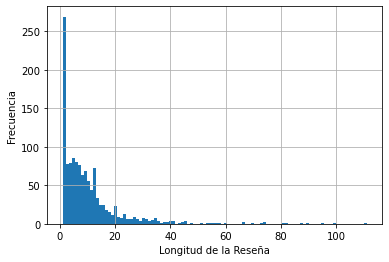

In [313]:
words_per_review = dfr.Reseñas.apply(lambda x: len(x.split(" ")))
words_per_review.hist(bins = 100)
plt.xlabel('Longitud de la Reseña')
plt.ylabel('Frecuencia')
plt.show()

In [314]:
print('Promedio de las Palabras:', words_per_review.mean())
print('Asimetria :', words_per_review.skew())

Promedio de las Palabras: 10.201272871917263
Asimetria : 3.4832844971313834


Se puede evidenciar que en la plataforma de Linio Colombia los usuarios al momento de calificar un producto no son tan expresivos, ya que se puede observar que el promedio de la longitud de las reseñas es de aproximadamente 11 palabras.

Ahora podemos ver la distribución de las estrellas:

In [321]:
#La suma de estrellas??
percent_val = dfr['Estrellas'].value_counts()
percent_val

5    978
4    122
1     92
3     41
2     24
Name: Estrellas, dtype: int64

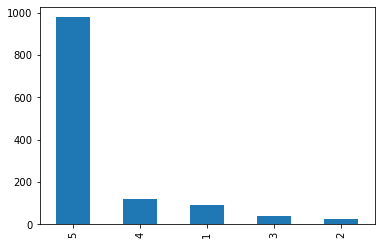

In [322]:
percent_val.plot.bar()
plt.show()

Se puede observar una gran desvalance en las estrellas, ya que la cantidad de productos con 5 estrellas mucho mas grande a comparacion de 4.0, 3.0, 2.0 y 1.0

# Visualización de texto mediante nubes de palabras

Ahora se busca la forma para apreciar la distribucion de las reseñas, y la mejor forma de hacer eso es con una nube de palabras.

Se puede conseguir una nuve de palabras de la siguiente manera:


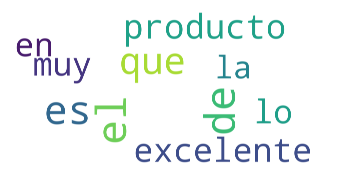

In [323]:
import nltk
from nltk import word_tokenize

from collections import Counter
from wordcloud import WordCloud

word_cloud_text = ''.join(dfr['Reseñas'])
wordcloud = WordCloud(max_font_size=100, 
                      max_words=10, 
                      background_color="white", 
                      scale = 10, 
                      width=800, 
                      height=400 
                     ).generate(word_cloud_text)

plt.figure()
plt.imshow(wordcloud, 
           interpolation="bilinear") 
plt.axis("off")
plt.show()

podemos evidenciar que en la nube de palabras obtenida se presentan palabras no deseadas, porque dichas no nos favorecen a el estudio.

# Estandarización de las estrellas para el análisis de sentimientos

Para el analisis de sentiminietos principalmente vamos a ignorar las calificaciones de 3 estrellas representan reseñas virtuales, para eso las clasificamos de forma binaria estipulando lo siguiente:
1.  Las reseñas con calificacion de 4.0 o 5.0 estrellas tomaran el valor de 1
2.  Las reseñas con calificacion de 1.0 o 2.0 estrellas tomaran el valor de 0



In [325]:
dfr["Estrellas"] = dfr["Estrellas"].astype(float).astype(int)




In [327]:

dfr['Sentimiento'] = np.where(dfr.Estrellas > 3,1,0)
##remover las clasificaciones neutrales
dfr = dfr[dfr.Estrellas != 3]
dfr['Sentimiento'].value_counts()


1    1100
0     116
Name: Sentimiento, dtype: int64

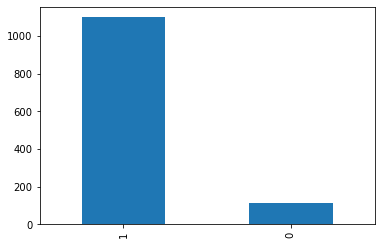

In [329]:
dfr.Sentimiento.value_counts().plot.bar()
plt.show()

Se evidencia un desequilibrio de clases.

In [330]:
dfr.head()

,IdReseña,IdProducto,Reseñas,Estrellas,Autor,Fecha,Sentimiento
0,1,1,Buen equipo y entrega a tiempo.,5,Por Deivid Rosero,2020-09-23,1
1,2,1,No me gusto el audio. No se oye bien.,1,Por Maria Fernanda Pineda Arias,2020-09-23,0
2,5,1,Funciona Bien,5,Por Luis Alfonso Moreno Luna,2020-09-21,1
3,8,1,No inicia el pc,1,Por JUAN DAVID URREA ZULUAGA,2020-09-21,0
4,10,1,Recomendado ciento por ciento,5,Por JOSE IGNACIO MORENO ALVAREZ,2020-09-20,1


# Eliminar Stopwords
Vamos a elimar las palabras que consideramos irrelevantes para el estudio.

In [331]:
#StopWords ESPAÑOL
from nltk.corpus import stopwords

noise_words = []
eng_stop_words = stopwords.words('spanish')


Para elimar este tipo de palabras usaremos la siguiente funcion:

In [334]:
stop_words = set(eng_stop_words)

def stopwords_removal(stop_words, sentence):
    return [word for word in nltk.word_tokenize(sentence) if word not in stop_words]

#ReseñasSinStopWords
dfr['ReseñaNew'] = dfr['Reseñas'].apply(lambda row: stopwords_removal(stop_words, row))
dfr[['Reseñas','ReseñaNew']]

C:\Users\KevinCarreno\Anaconda3\envs\NLP_MDII\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


,Reseñas,ReseñaNew
0,Buen equipo y entrega a tiempo.,"[Buen, equipo, entrega, tiempo, .]"
1,No me gusto el audio. No se oye bien.,"[No, gusto, audio, ., No, oye, bien, .]"
2,Funciona Bien,"[Funciona, Bien]"
3,No inicia el pc,"[No, inicia, pc]"
4,Recomendado ciento por ciento,"[Recomendado, ciento, ciento]"
...,...,...
1252,Buen producto.,"[Buen, producto, .]"
1253,Muchas gracias llegó rápido muy bonito el moni...,"[Muchas, gracias, llegó, rápido, bonito, monit..."
1254,Las pantallas siempre causan efectos negativos...,"[Las, pantallas, siempre, causan, efectos, neg..."
1255,Fue rápido el proceso desde la compra hasta la...,"[Fue, rápido, proceso, compra, entrega]"


# Creación de un modelo de Machine Learning

In [337]:
dfr

,IdReseña,IdProducto,Reseñas,Estrellas,Autor,Fecha,Sentimiento,ReseñaNew
0,1,1,Buen equipo y entrega a tiempo.,5,Por Deivid Rosero,2020-09-23,1,"[Buen, equipo, entrega, tiempo, .]"
1,2,1,No me gusto el audio. No se oye bien.,1,Por Maria Fernanda Pineda Arias,2020-09-23,0,"[No, gusto, audio, ., No, oye, bien, .]"
2,5,1,Funciona Bien,5,Por Luis Alfonso Moreno Luna,2020-09-21,1,"[Funciona, Bien]"
3,8,1,No inicia el pc,1,Por JUAN DAVID URREA ZULUAGA,2020-09-21,0,"[No, inicia, pc]"
4,10,1,Recomendado ciento por ciento,5,Por JOSE IGNACIO MORENO ALVAREZ,2020-09-20,1,"[Recomendado, ciento, ciento]"
...,...,...,...,...,...,...,...,...
1252,3289,406,Buen producto.,5,Por Douglas Eduardo Molina Orjuela Douglas Edu...,2020-04-26,1,"[Buen, producto, .]"
1253,3292,407,Muchas gracias llegó rápido muy bonito el moni...,5,Por Diego Vinasco,2020-04-08,1,"[Muchas, gracias, llegó, rápido, bonito, monit..."
1254,3295,409,Las pantallas siempre causan efectos negativos...,5,Por Montgomery Piedra Valencia,2020-12-08,1,"[Las, pantallas, siempre, causan, efectos, neg..."
1255,3296,410,Fue rápido el proceso desde la compra hasta la...,5,Por Nelson Ortiz Valero,2020-08-28,1,"[Fue, rápido, proceso, compra, entrega]"


La tecnica de aprendizaje que fue escogida para este proyecto es la **regresion lineal** ya que es lo que mas facil se adapta a nuestro tipo de datos, y relativamente sencilla de comprender y aplicar

Con nuestros datos limpios y un analisis completo, se empieza a crear el modelo de Machine Learning, para esto nos centramos en tres columnas importantes de nuestro data Set las cuales son:
1. **```Reseñas```** 
2. **```Estrellas```** 
3. **```Sentimiento ```** 

In [339]:
dfr[['Reseñas','Estrellas','Sentimiento']].head(5)

,Reseñas,Estrellas,Sentimiento
0,Buen equipo y entrega a tiempo.,5,1
1,No me gusto el audio. No se oye bien.,1,0
2,Funciona Bien,5,1
3,No inicia el pc,1,0
4,Recomendado ciento por ciento,5,1


Para poder analizar las Reseñas de manera mas optima los clasificaremos en N-Grams ya que nos da la posibilidad de entender mejor el contexto de la oracion

# Bolsa de palabras

Creemos una matriz de co-ocurrencia de documentos de palabras para nuestro conjunto de revisiones usando la clase ```CountVectorizer``` que automáticamente da cuenta de ciertos pasos de preprocesamiento como eliminar palabras vacías, derivar, crear n-gramas y tokenización de palabras:

In [340]:
from sklearn.feature_extraction.text import CountVectorizer

vec = CountVectorizer()
X = vec.fit_transform(dfr['Reseñas'])
df = pd.DataFrame(X.toarray(), columns = vec.get_feature_names())
df.head()

,000,0ghz,10,100,103a,1080,12,120,144,144hz,...,ágiles,él,éste,ñapa,óptico,óptima,óptimas,óptimo,único,útil
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Usemos esto para crear una bolsa de palabras de las reseñas.

In [341]:
bow_counts = CountVectorizer(tokenizer= word_tokenize, 
                             stop_words=noise_words, 
                             ngram_range=(1,1)) 

bow_data = bow_counts.fit_transform(dfr['Reseñas'])

In [342]:
bow_data

<1216x1857 sparse matrix of type '<class 'numpy.int64'>'
	with 11723 stored elements in Compressed Sparse Row format>

Ya preparada nuestra **Bolsa De Palabras**, se divide el dataset dividirse en conjuntos de entrenamiento y de prueba:

Para hacer esto usamos lo siguiente:

In [343]:
X_train_bow, X_test_bow, y_train_bow, y_test_bow = train_test_split(bow_data, # Caracteristicas
                                                                    dfr['Sentimiento'], # Variable Objetivo
                                                                    test_size = 0.2, # 20% de tamaño de prueba
                                                                    random_state = 0) # estado aleatorio para fines de replicación

In [344]:

y_test_bow.value_counts()/y_test_bow.shape[0]

1    0.893443
0    0.106557
Name: Sentimiento, dtype: float64

tenemos cerca del 94% datos positivos lo cual es algo que no es muy recomendable para entrenar el modelo, etonces se recurrira a recopilar mas datos o aplicar una Tecnica de Smote

# Aplicar regresión logística


1. **Entremaniento:**
Para entrenar el modelo  primero lo haremos con las variables que ya tenemos las cuales son con 1-Gram, despues de entrenarlas con estos tipos pasaremos a entrenar nuestro modelos con N-Grams para tener mas exactitud.
2. **Prueba del algoritmo de Aprendizaje:**
Vamos a ver cómo podemos hacer predicciones una vez que nuestro modelo está entrenado. Primero haremos predicciones absolutas y luego predicciones relativas.
3. **Prueba Unitaria:**
Para verificar que nuestro modelo funciona correctamente, recopilaremos informacion de reseñas y productos que no esten ni el el conjunto de entremaniento ni de prueba, para asi verificar su funcionamiento.
4. **Extracion de datos Estadisticos:**



